In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n, k] * d(M[k], X[n])
    return cost

def plot_k_means(X, K, max_iter=20, beta=1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.ones((N, K)) / K

    #initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((K, 3))
    plt.figure()

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        #move the plot inside  the for loop
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i+1)
        plt.scatter(X[:,0], X[:,1], c=colors)

        #step-1 determine assignments / responsibilites
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta * d(M[k], X[n])) / np.sum( np.exp(-beta * d(M[k], X[n])) for j in range(K))

        #step-2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        # if i > 0:
        #     if np.abs(costs[i] - costs[i-1]) < 1e-9:
        #         print('Error less than threshold, breaking out!')
        #         break

    plt.show()

In [0]:
def main():
    #assume 3 means
    D = 2 #so we can visualize more easily
    s = 4 #separation, so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 #number of samples
    X = np.zeros((N, D))
    X[:300,:] = np.random.randn(300, D) + mu1
    X[300:600,:] = np.random.randn(300, D) + mu2
    X[600:,:] = np.random.randn(300, D) + mu3

    #visualize without clustering
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # luckily, we already know this
    plot_k_means(X, K)

    # K = 5 # what happens if we choose a "bad" K?
    # plot_k_means(X, K, max_iter=30)

    # K = 5 # what happens if we change beta?
    # plot_k_means(X, K, max_iter=30, beta=0.3)

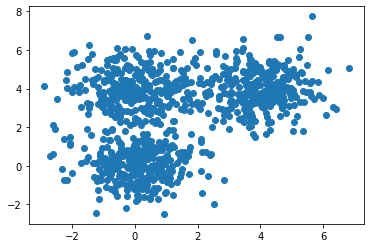

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


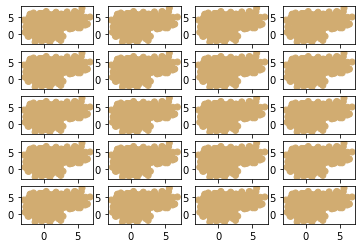

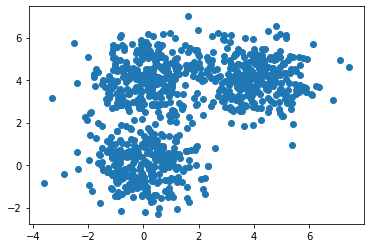

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


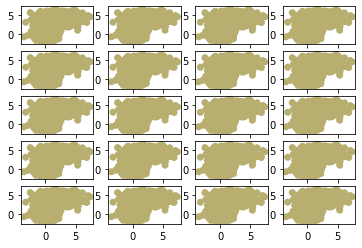

In [23]:
if __name__ == '__main__':
    main()